# 01. Image Preprocessing - PART 02 - AUGMENTATION

### Imports

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

### Mode of running

In [17]:
TEST_MODE = False
TEST_MODE_AUG_COUNT = 2
RUN_MODE_AUG_COUNT = 5

### Paths

In [18]:
BASE_PATH = './data'
ORIGINAL_IMAGES = f'{BASE_PATH}/unsplit'

In [19]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Reading the resized images

In [22]:
def read_images():
    dataset = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            dataset.append([img, cat_num])
        if TEST_MODE and cat_num == 2:
            break # - then will only take the images from the first category
            
    return dataset

In [23]:
dataset = read_images()
len(dataset)

896

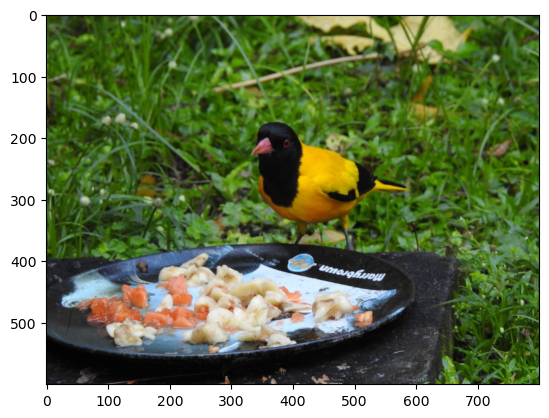

In [26]:
plt.imshow(dataset[0][0])

### Image Augmentation

In [27]:
AUG_COUNT_PER_IMG = TEST_MODE_AUG_COUNT if TEST_MODE else RUN_MODE_AUG_COUNT

In [28]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1./255,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [29]:
# TO TEST ONLY
pic_array = dataset[0][0].reshape((1,) + dataset[0][0].shape)
pic_array.shape

(1, 600, 800, 3)

In [ ]:
# batch_size: At a time, how many images should be generated.
for data in dataset:
        reshaped_img = data[0].reshape((1,) + data[0].shape)
        count = 0
        cat_name = CATEGORIES[data[1]]
        if cat_name == "Other":
            continue
        for batch in datagen.flow(reshaped_img, batch_size=1, save_to_dir=os.path.join(ORIGINAL_IMAGES,cat_name), 
                                  save_prefix=cat_name, save_format='.jpg'):
            count += 1
            if count == AUG_COUNT_PER_IMG:
                break